<a href="https://colab.research.google.com/github/laredo02/artifacts/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torchvision import transforms
from torchvision import models
from torchvision.models import AlexNet_Weights
import urllib
import matplotlib.pyplot as plt
from PIL import Image

print(torch.__version__)
print(torch.cuda.is_available())
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


2.2.1+cu121
True
cuda


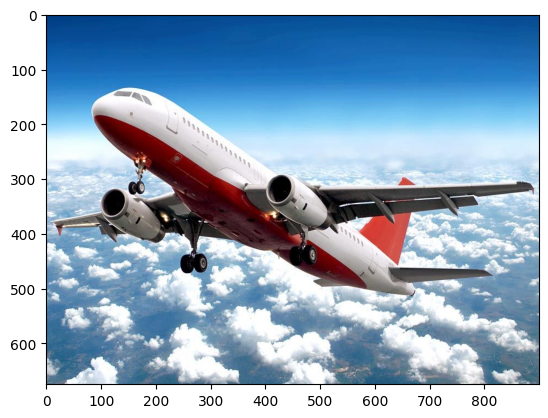

In [3]:
#url = "https://pytorch.tips/coffee"
url = "https://cdn.britannica.com/69/155469-131-14083F59/airplane-flight.jpg"

fpath = "image.jpg"

urllib.request.urlretrieve(url, fpath)
image = Image.open("image.jpg")
plt.imshow(image)


In [4]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.445, 0.406], std=[0.229, 0.224, 0.225])
])

image_tensor = transform(image)
batch = image_tensor.unsqueeze(0)
print(image_tensor.device, image_tensor.type, image_tensor.shape)
print(batch.shape)


cpu <built-in method type of Tensor object at 0x7bc4db873ec0> torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [5]:
model = models.alexnet(weights=AlexNet_Weights.DEFAULT)
print(model)
model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)
max, index = torch.max(y, 1)
print(index, max)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 112MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
url = "https://pytorch.tips/imagenet-labels"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)
with open("imagenet_class_labels.txt") as f:
  classes = [line.strip() for line in f.readlines()]

prob = torch.nn.functional.softmax(y, dim=1)[0]*100
print(classes[index], prob[index].item())
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

404: 'airliner', 81.73764038085938
404: 'airliner', 81.73764038085938
908: 'wing', 5.8955979347229
657: 'missile', 4.718894004821777
744: 'projectile, missile', 4.338054656982422
812: 'space shuttle', 2.9880738258361816
